# **Zootechnique Parameter Analysis**

In [1]:
# Intial set up

# Import required libraries for data wrangling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import shapiro # Normal test Shapiro
from scipy.stats import normaltest # Normal test D'Augustion Pearson
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [2]:
# Setting the option to display all columns
pd.set_option('display.max_columns', None)

# loading data
data_all = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTOQO2R46-afex7CsDg-nRidlN6OQHZnyWso1EpzDkuPG8ZtLxNYBmV4jQD834dR6BRouiUnnaT3nbk/pub?gid=336891931&single=true&output=csv')

# Displayin the first five rows of data
data_all.head(10)

,ABW,SIZE,ADG_AVG,FEED/DAY_KG,CUMULATIF_FEED,SR_%,POPULASI,BIOMASS_KG,%_FR,FCR
0,0.70,1425.00,0.02,31,548.000,1.00,327252,229.65,13.50,2.39
1,0.97,1028.85,0.03,31,548.000,0.92,280312,272.45,11.38,2.01
2,0.83,1200.00,0.03,31,548.000,0.99,301306,251.09,12.35,2.18
3,1.54,648.00,0.04,35,858.000,0.83,253948,391.89,8.93,2.19
4,1.63,614.88,0.04,35,855.000,0.81,247447,402.43,8.70,2.12
5,1.63,613.64,0.04,35,858.000,0.81,246947,402.43,8.70,2.13
6,2.90,345.18,0.06,35,1.023,0.60,182463,528.61,6.62,1.94
7,2.35,425.63,0.05,39,1.029,0.78,238876,561.23,6.95,1.83
8,1.87,347.92,0.06,35,1.023,0.60,183583,527.66,6.63,1.94
9,4.36,229.26,0.08,40,1.309,0.52,159624,696.25,5.75,1.88


In [3]:
# Summary of dataset
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ABW             33 non-null     float64
 1   SIZE            33 non-null     float64
 2   ADG_AVG         33 non-null     float64
 3   FEED/DAY_KG     33 non-null     int64  
 4   CUMULATIF_FEED  33 non-null     float64
 5   SR_%            33 non-null     float64
 6   POPULASI        33 non-null     int64  
 7   BIOMASS_KG      33 non-null     float64
 8   %_FR            33 non-null     float64
 9   FCR             33 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.7 KB


In [4]:
# defining numerical and categorical columns

# Identifying numerical columns (excluding datetime and object types) and excluding 'Minggu Ke-' (We do not use 'Minggu Ke-' for EDA observation)
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64']]

# Identifying categorical colums that contains 'object'
categorical = [var for var in data_all.columns if data_all[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

,Column Type,Columns
0,Categorical,[]
1,Numerical,"[ABW, SIZE, ADG_AVG, FEED/DAY_KG, CUMULATIF_FEED, SR_%, POPULASI, BIOMASS_KG, %_FR, FCR]"


In [5]:
# Normality test (Shapiro-Wilk), skewness and data distribution of numerical data

# Identifying numerical columns (excluding datetime and object types) and excluding 'Minggu Ke-' (We do not use 'Minggu Ke-' for EDA observation)
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64']]

from scipy.stats import shapiro

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = shapiro(data_all[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = data_all[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,ABW,0.944622,9.264517e-02,Normally Distributed,0.269332,Right Skew
1,SIZE,0.688867,4.446796e-07,Not Normally Distributed,2.113799,Right Skew
2,ADG_AVG,0.954569,1.806677e-01,Normally Distributed,-0.030412,Left Skew
3,FEED/DAY_KG,0.898572,4.892410e-03,Not Normally Distributed,0.704126,Right Skew
4,CUMULATIF_FEED,0.606875,3.310395e-08,Not Normally Distributed,1.824435,Right Skew
5,SR_%,0.944228,9.022574e-02,Normally Distributed,-0.010260,Left Skew
6,POPULASI,0.955190,1.882964e-01,Normally Distributed,0.051614,Right Skew
7,BIOMASS_KG,0.940080,6.829574e-02,Normally Distributed,-0.094425,Left Skew
8,%_FR,0.836476,1.739586e-04,Not Normally Distributed,1.378815,Right Skew
9,FCR,0.902958,6.362256e-03,Not Normally Distributed,1.435803,Right Skew


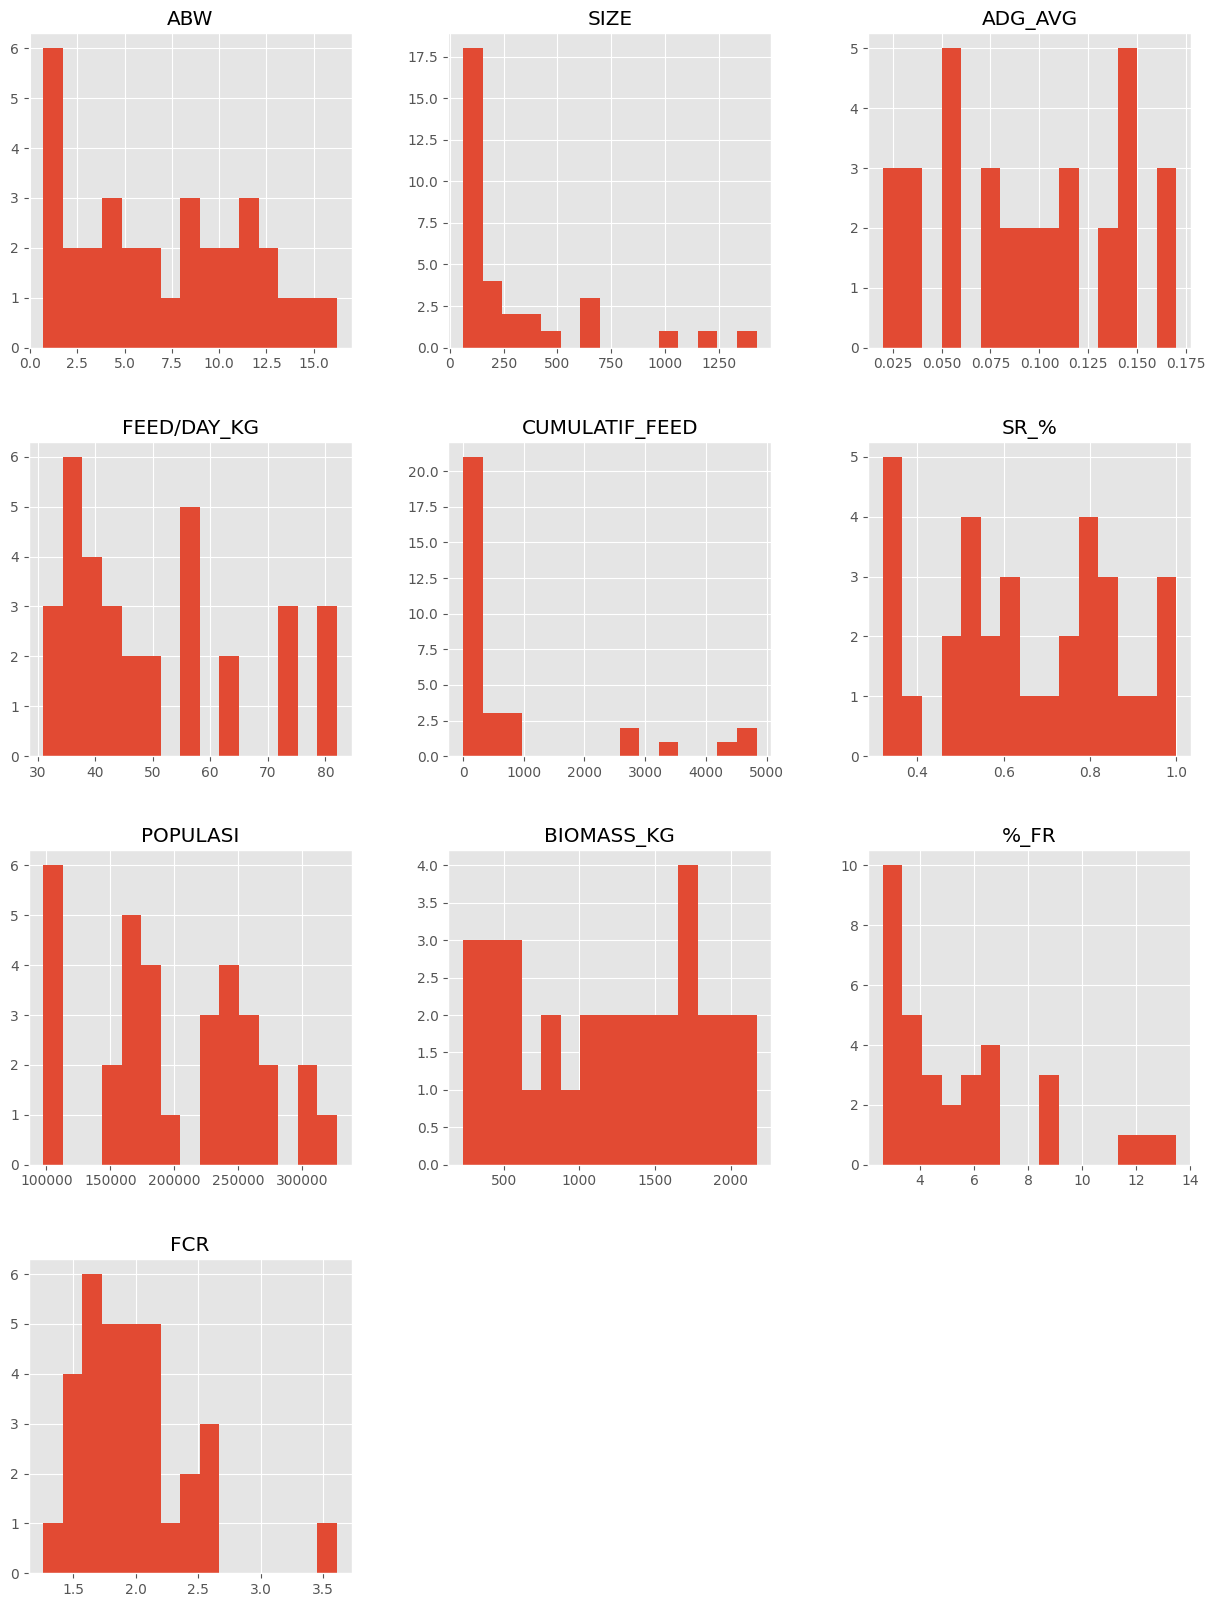

In [6]:
# ploting the histogram of numerical columns
# Checking data distribution of numerical columns via visual observation
data_all.hist(bins=15, figsize=(15,20))
plt.show()

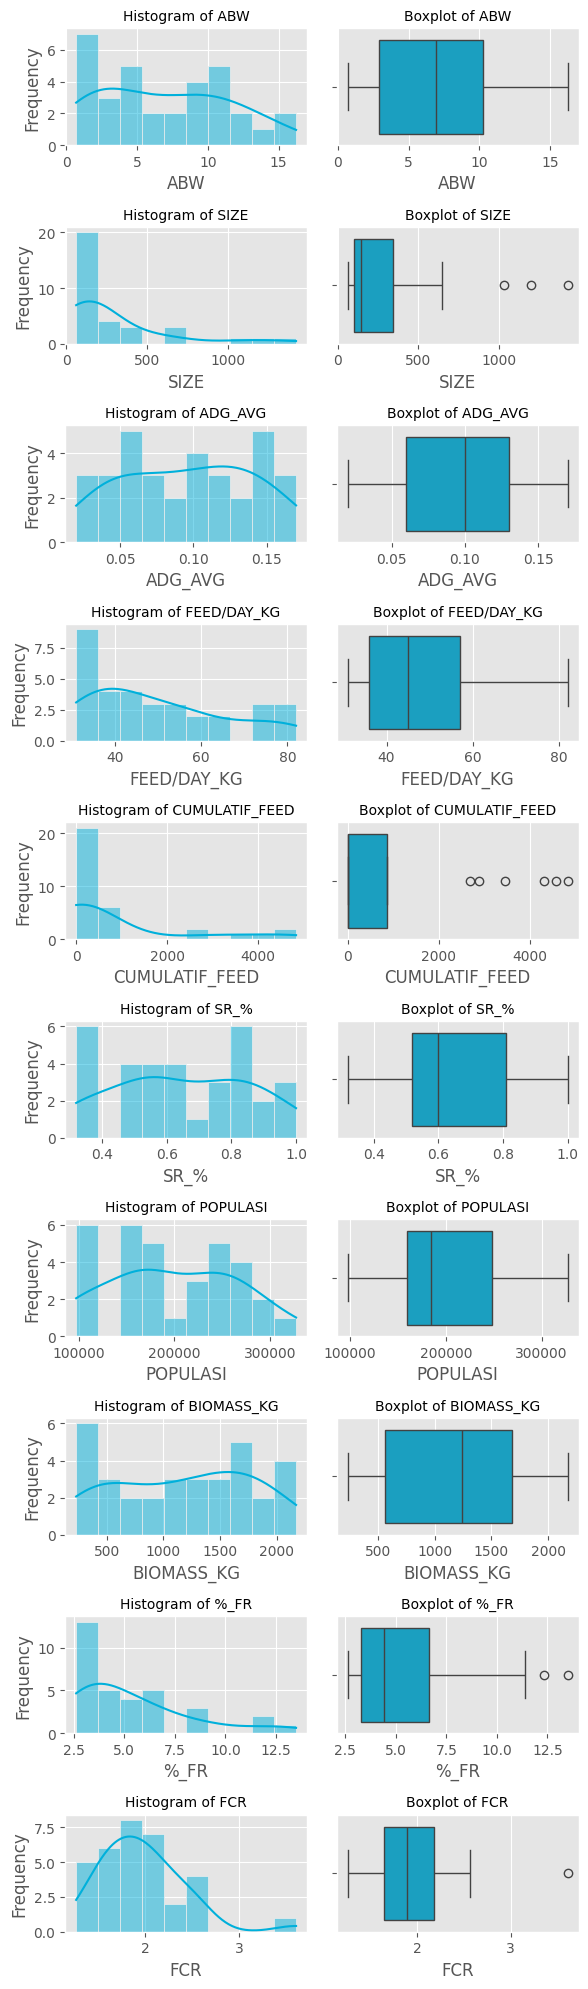

In [7]:
# Creating histogram for the numerical data
plt.figure(figsize=(6, 20))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data_all[col], kde=True, color='#00b0db', bins=10)
    plt.title(f'Histogram of {col}', size=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data_all[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

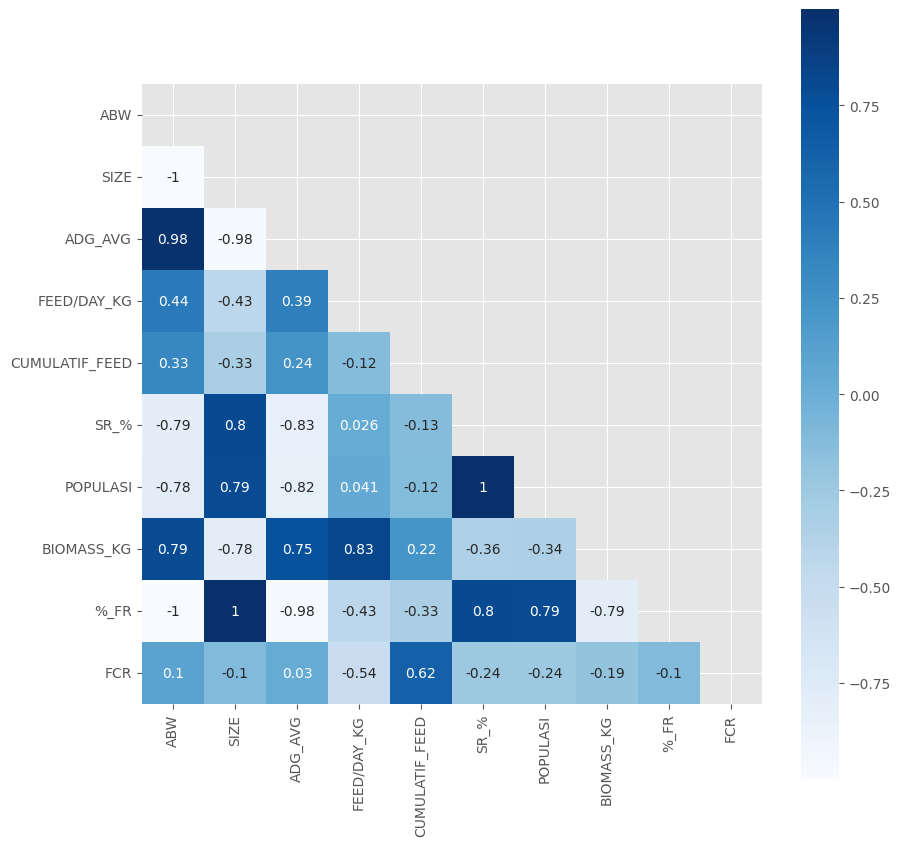

In [8]:
# Correlation between numerical features
plt.figure(figsize=(10, 10))

matrix = np.triu(data_all[numerical].corr(method='spearman'))

sns.heatmap(data=data_all[numerical].corr(method='spearman'), annot=True, cmap='Blues', center=0, mask = matrix, square='True')
plt.show()